# Experiments

This experiment guide includes nine experiments, introducing basic equipment operation and
Configuration, TensorFlow's helloworld, sessions, matrix multiplication, TensorFlow
Virtualization, and housing price prediction.

- Experiment 1: "Hello, TensorFlow".
- Experiment 2: Understand functions of sessions through a session experiment using the with session function.
- Experiment 3: Understand matrix multiplication by multiplying two matrices with ranks of tensors greater than 2.
- Experiment 4: Understand the definition of variables.
  - Define variables with Variable and get_variable respectively and observe the difference between these two methods.
- Experiment 5: Understand the visualization of TensorBoard.
  - TensorBoard aggregates all kinds of data into a log file.
  - You can enable TensorBoard service to read the log file and enable the 6060 port to provide web services so that users can view data via a browser.
- Experiment 6: Understand data reading and processing by reading .csv files and displaying them based on given conditions.
- Experiment 7: Understand graphic operations.
  - Create a graph in three ways and set it as the default graph. Use the get_default_graph() function to access the default graph and verify its settings.
- Experiment 8: Understand save and use of models.
  - After importing data, analyze data characteristics and define variables based on the characteristics.
  - Create a model and define output nodes.
  - Build the structure for forward propagation and then the structure for backpropagation.
  - Compile and train the model to get appropriate parameters.
  - After training data and testing the model, create a saver and a path to save parameters in the session automatically.
  - When the model is saved, you can access the model for use.
- Experiment 9: A comprehensive experiment of forecasting housing price through the instantiation of linear regression.
  - Use the dataset of housing prices in Beijing and skills in the prior eight experiments to forecast the housing price.

## Experiment 1

In [1]:
import tensorflow as tf

In [2]:
# Defining a variable
hello = tf.constant("hello, tensorflow!")  # a constant

In [3]:
sess = tf.Session()  # Creates a session
print(sess.run(hello))  # Run the session on the `hello` constant to get the result

b'hello, tensorflow!'


In [4]:
sess.close()  # Close the session

## Experiment 2
- After this experiment you will understand the definition of sessions and how to use them with the python context manager (`with`).

In [5]:
import tensorflow as tf

In [6]:
# Defining constants
a = tf.constant(3)
b = tf.constant(4)

In [7]:
# Creating a Session
with tf.Session() as sess:  # `with` starts a context where Session will be automatically closed
    print(f"Add: {sess.run(a + b)}")
    print(f"Multiply: {sess.run(a * b)}")

Add: 7
Multiply: 12


## Experiment 3
- After this experiment you will understand the "tensor" part of TensorFlow and how to use TensorFlow to multiply matrices.

In [8]:
import tensorflow as tf

In [9]:
# Start a TF default session
sess = tf.InteractiveSession()

In [10]:
# Creates two matrix variables
w1 = tf.Variable(tf.random_normal(shape=[2, 3], mean=1.0, stddev=1.0))
w2 = tf.Variable(tf.random_normal(shape=[3, 1], mean=1.0, stddev=1.0))

In [11]:
# Defining a constant matrix
x = tf.constant([[0.7, 0.9]])

In [12]:
# Initializing global variables: w1, w2
tf.global_variables_initializer().run()

In [13]:
# Multiply matrices
a = tf.matmul(x, w1)
b = tf.matmul(a, w2)
print(b.eval())  # Evaluates tensor `b` in the session

[[1.5451163]]


## Experiment 4
- After this experiment you will understand `tf.Variable` and the `get_variable` function.

In [14]:
import tensorflow as tf

In [15]:
# Clears the default graph stack and resets the global default graph.
tf.reset_default_graph()

In [16]:
var1 = tf.Variable(10.0, name="varname")
var2 = tf.Variable(11.0, name="varname")
var3 = tf.Variable(12.0)
var4 = tf.Variable(13.0)

In [17]:
# Variable scope allows you to create new variables and to share already created ones
# while providing checks to not create or share by accident.
# TODO: make it more clear
with tf.variable_scope("test1"):
    var5 = tf.get_variable("varname", shape=[2], dtype=tf.float32)

with tf.variable_scope("test2"):
    var6 = tf.get_variable("varname", shape=[2], dtype=tf.float32)

In [18]:
print("var1: ", var1.name)
print(
    "var2: ", var2.name
)  # A tf variable with a existing name gets a suffix to differentiate between them
print("var3: ", var3.name)
print("var4: ", var4.name)
print(
    "var5: ", var5.name
)  # With `variable_scope` we can enclose a variable within a desired scope
print("var6: ", var6.name)

var1:  varname:0
var2:  varname_1:0
var3:  Variable:0
var4:  Variable_1:0
var5:  test1/varname:0
var6:  test2/varname:0


## Experiment 5
- After this experiment you will understand the virtualization tool TensorBoard.

In [19]:
import time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def moving_average(a, w=10):
    if len(a) < w:
        return a[:]
    ma = [val if idx < w else sum(a[(idx - w) : idx]) / w for idx, val in enumerate(a)]
    return ma

In [21]:
x_train = np.linspace(-1, 1, 100)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.3  # y = 2 * x + noise

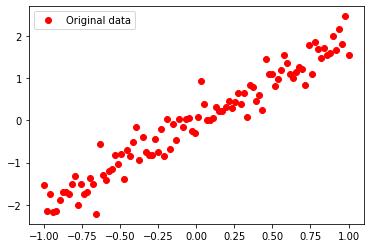

In [22]:
plt.plot(x_train, y_train, "ro", label="Original data")
plt.legend()
plt.show()

tf.reset_default_graph()

In [23]:
# Creating a model
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Model parameters
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1], name="bias"))

In [24]:
z = tf.multiply(X, W) + b
tf.summary.histogram("z", z)

<tf.Tensor 'z:0' shape=() dtype=string>

In [25]:
# Reverse optimization

# Cost function
cost = tf.reduce_mean(tf.square(Y - z))
tf.summary.scalar("loss_function", cost)

# Gradient descent
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [26]:
# Start a session
init = tf.global_variables_initializer()
plot_data = {"batch_size": [], "loss": []}
with tf.Session() as sess:
    sess.run(init)
    # Merge all summaries
    merged_summary_op = tf.summary.merge_all()
    # Create summary writer for the writing
    summary_writer = tf.summary.FileWriter(f"log/run-{time.time_ns()}", sess.graph)

    # Write data to the model
    training_epochs = 15
    display_step = 1
    for epoch in range(training_epochs):
        for (x, y) in zip(x_train, y_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            summary_str = sess.run(merged_summary_op, feed_dict={X: x, Y: y})
            summary_writer.add_summary(summary_str, epoch)

        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X: x_train, Y: y_train})
            weights = sess.run(W)
            bias = sess.run(b)
            print(f"Epoch: {epoch + 1} cost={loss}, W={weights}, b={bias}")
            if loss:
                plot_data["batch_size"].append(epoch)
                plot_data["loss"].append(loss)

    print("Finished!")
    cost = sess.run(cost, feed_dict={X: x_train, Y: y_train})
    weights = sess.run(W)
    bias = sess.run(b)
    print(f"cost={cost}, W={weights}, b={bias}")

Epoch: 1 cost=1.2462329864501953, W=[0.33809304], b=[0.46804062]
Epoch: 2 cost=0.43459248542785645, W=[1.1211348], b=[0.28926715]
Epoch: 3 cost=0.1788294017314911, W=[1.540056], b=[0.14429732]
Epoch: 4 cost=0.10897979140281677, W=[1.7557671], b=[0.06356741]
Epoch: 5 cost=0.09048717468976974, W=[1.865804], b=[0.02160704]
Epoch: 6 cost=0.08558515459299088, W=[1.9218029], b=[0.00015223]
Epoch: 7 cost=0.08426304906606674, W=[1.9502841], b=[-0.01077285]
Epoch: 8 cost=0.08389387279748917, W=[1.9647676], b=[-0.01633023]
Epoch: 9 cost=0.0837845578789711, W=[1.9721321], b=[-0.01915624]
Epoch: 10 cost=0.08374923467636108, W=[1.9758775], b=[-0.02059349]
Epoch: 11 cost=0.08373653143644333, W=[1.9777818], b=[-0.02132428]
Epoch: 12 cost=0.08373143523931503, W=[1.97875], b=[-0.02169579]
Epoch: 13 cost=0.08372917026281357, W=[1.9792423], b=[-0.02188473]
Epoch: 14 cost=0.0837281197309494, W=[1.979493], b=[-0.02198095]
Epoch: 15 cost=0.08372760564088821, W=[1.9796203], b=[-0.02202977]
Finished!
cost=0.0

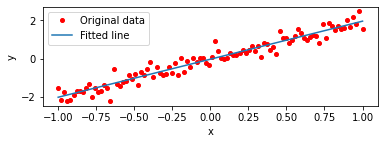

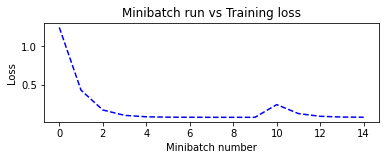

In [27]:
# Visualize results
y_pred = weights * x_train + bias
plot_data["avgloss"] = moving_average(plot_data["loss"])

plt.subplot(211)
plt.plot(x_train, y_train, "ro", markersize=4, label="Original data")
plt.plot(x_train, y_pred, label="Fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.subplot(212)
plt.plot(plot_data["batch_size"], plot_data["avgloss"], "b--")
plt.xlabel("Minibatch number")
plt.ylabel("Loss")
plt.title("Minibatch run vs Training loss")

plt.show()

Now, in your terminal, type: `tensorboard --logdir log` and go to the given address. You can see your training log!

## Experiment 6
- After this experiment, you will understand how to read data from files with TensorFlow.
- TODO: use `tf.data` and `tf.data.TextLineDataset`.

In [28]:
import tensorflow as tf

In [29]:
data = tf.train.string_input_producer(["data.csv"])
reader = tf.TextLineReader()

# Getting queue values
key, value = reader.read(data)
# key represents the information of the read file and the number of rows.
# value represents the raw strings read by row, which are sent to the decoder for decoding.

# The data type here determines the type of data to be read, which should be in the list form.
record_defaults = [[1.0], [1.0], [1.0], [1.0]]
# Each parsed attribute (column) is a scalar with the rank value of 0
col1, col2, col3, col4 = tf.decode_csv(value, record_defaults=record_defaults)
features = tf.stack([col1, col2, col3])

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TextLineDataset`.


In [30]:
init_op = tf.global_variables_initializer()
local_init_op = tf.local_variables_initializer()

In [31]:
with tf.Session() as sess:
    # Start a session and perform initialization
    sess.run(init_op)
    sess.run(local_init_op)
    # Start populating the filename queue
    coord = tf.train.Coordinator()
    # Feed the queue
    threads = tf.train.start_queue_runners(coord=coord)
    for i in range(30):
        example, label = sess.run([features, col4])
        print(example, label)

    print("Done!")

    coord.request_stop()
    coord.join(threads)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
[-0.76 15.67 -0.12] 15.67
[-0.48 12.52 -0.06] 12.51
[1.33 9.11 0.12] 9.1
[-0.88 20.35 -0.18] 20.36
[-0.25  3.99 -0.01] 3.99
[-0.87 26.25 -0.23] 26.25
[-1.03  2.87 -0.03] 2.87
[-0.51  7.81 -0.04] 7.81
[-1.57 14.46 -0.23] 14.46
[-1.000e-01  1.002e+01 -1.000e-02] 10.02
[-0.56  8.92 -0.05] 8.92
[-1.2   4.1  -0.05] 4.1
[-0.77  5.15 -0.04] 5.15
[-0.88  4.48 -0.04] 4.48
[-2.7  10.82 -0.3 ] 10.82
[-1.23  2.4  -0.03] 2.4
[-0.77  5.16 -0.04] 5.15
[-0.76 15.67 -0.12] 15.67
[-0.81  6.15 -0.05] 6.15
[-0.6   5.01 -0.03] 5.0
[-1.25  4.75 -0.06] 4.75
[-25.3    7.31  -0.19] 7.3
[-1.15 16.39 -0.19] 16.39
[-1.7   5.19 -0.09] 5.18
[-0.62  3.23 -0.02] 3.22
[-0.74 17.43 -0.13] 17.41
[-0.77 15.41 -0.12] 15.41
[ 0. 47.  0.] 47.01
[0.25 3.98 0.01] 3.98
[-1.1   9.01 -0.1 ] 9.01
Done!


## Experiment 7
- After this exepriment, you will understand graphic operations with TensorFlow. That is, oprations within graphs.

In [32]:
import numpy as np
import tensorflow as tf

In [33]:
# Defines a constant variable
c = tf.constant(0.0)
# Creates a graph
g = tf.Graph()
with g.as_default():
    c1 = tf.constant(0.0)
    print(c1.graph)
    print(g)
    # Not the same graph as c1.graph and g
    print(c.graph)

# Same graph as c.graph
g2 = tf.get_default_graph()
print(g2)

# Reset graphs
tf.reset_default_graph()
g3 = tf.get_default_graph()
print(g3)  # New graph

In [34]:
# Get the tensor
print(c1.name)
t = g.get_tensor_by_name(name="Const:0")  # This name is the default one.
print(t)

Const:0
Tensor("Const:0", shape=(), dtype=float32)


In [35]:
# Get an operation

# Define constant variables
a = tf.constant([[1.0, 2.0]])
b = tf.constant([[1.0], [3.0]])

# Define a op named 'example_op'
tensor1 = tf.matmul(a, b, name="example_op")
# Print op.name and itself (and break line)
print(tensor1.name, tensor1)
# Get same op as above using its output tensor name
test = g3.get_tensor_by_name("example_op:0")
print(test)

print(tensor1.op.name)
test_op = g3.get_operation_by_name("example_op")
print(test_op)

with tf.Session() as sess:
    test = sess.run(test)
    print(test)
    test = tf.get_default_graph().get_tensor_by_name("example_op:0")
    print(test)

# TODO: improve this output

example_op:0 Tensor("example_op:0", shape=(1, 1), dtype=float32)
Tensor("example_op:0", shape=(1, 1), dtype=float32)
example_op
name: "example_op"
op: "MatMul"
input: "Const"
input: "Const_1"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "transpose_a"
  value {
    b: false
  }
}
attr {
  key: "transpose_b"
  value {
    b: false
  }
}

[[7.]]
Tensor("example_op:0", shape=(1, 1), dtype=float32)


In [36]:
# Get all lists

# Return the list of operating nodes in the graph
tt2 = g.get_operations()
print(tt2)

[<tf.Operation 'Const' type=Const>]


In [37]:
# Get an object
tt3 = g.as_graph_element(c1)
print(tt3)

Tensor("Const:0", shape=(), dtype=float32)


## Experiment 8
- After this experiment, you will know how to save and load models.
- TODO: use `tensorflow_datasets`

### Saving a model

In [38]:
import os
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets("mnist", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [39]:
# Define a input variable
X = tf.placeholder(tf.float32, [None, 784])

# Define parameters
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Define an activation function
logits = tf.nn.softmax(tf.matmul(X, W) + b)

# Define an ouput variable
y = tf.placeholder(tf.float32, [None, 10])

# Define a cost function
cross_entropy = tf.reduce_mean(
    -tf.reduce_sum(y * tf.log(logits), reduction_indices=[1])
)

# Define an optimization function
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [40]:
# Initialize variables
init = tf.global_variables_initializer()

# Define a session
sess = tf.Session()

# Initialize the session
sess.run(init)

# Define the saver of the model
saver = tf.train.Saver()

# Perform n_rounds
n_rounds = 1000
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={X: batch_xs, y: batch_ys})

print("Training finished!")

Training finished!


In [41]:
# Create a saving directory for the model
model_dir = "mnist_model"
model_name = "ckp"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [42]:
# Save the model
loc = saver.save(sess, os.path.join(model_dir, model_name))

print(f"The model is saved on {loc}!")

# ### Saving a model

The model is saved on mnist_model/ckp!


### Loading a model

In [43]:
# TODO: explaing why this is needed
tf.reset_default_graph()

# Create a session
sess = tf.Session()

# Define an input variable
X = tf.placeholder(tf.float32, [None, 784])

# Define model parameters
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Define a model and a activation function
logits = tf.nn.softmax(tf.matmul(X, W) + b)

# Define the saver of the model
saver = tf.train.Saver([W, b])

In [44]:
# Restore the model
saver.restore(sess, "mnist_model/ckp")

print("The model is restored!")

INFO:tensorflow:Restoring parameters from mnist_model/ckp
The model is restored!


In [50]:
# Fecth a image
idx = 0
img = mnist.test.images[idx]

# Compute results
ret = sess.run(logits, feed_dict={X: img.reshape(1, 784)})

print("The model result is computed!")

# Display results
y_pred = ret.argmax()
y_true = mnist.test.labels[idx].argmax()
print(f"Predicted results: {y_pred} (prob={ret.max():.4f})")  # `ret` is a vector of probabilities
print(f"Actual result: {y_true}")

The model result is computed!
Predicted results: 7 (prob=0.9970)
Actual result: 7


## Experiment 9
- After this experiment, you will know how to perform a linear regression using TensorFlow.

In [57]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

tf.reset_default_graph()

In [58]:
data = pd.read_csv('bj_housing2.csv')

# Preprocess
train_data = data[data['Area'] < 12000]
x_train = train_data['Area'].values.reshape(-1, 1)
y_train = train_data['Value'].values.reshape(-1, 1)
n_samples = x_train.shape[0]

In [59]:
# Define training parameters
learning_rate = 2
training_epochs = 10
display_step = 1

# Define variables
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name='weight', dtype=tf.float32)
b = tf.Variable(np.random.randn(), name='bias', dtype=tf.float32)

In [60]:
# Create model
prediction = tf.add(tf.multiply(W, X), b)
# Loss function
cost = tf.reduce_sum(tf.pow(prediction - y, 2)) / (2 * n_samples)
# Optimize
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [62]:
# Initialize variables
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    # Train
    for epoch in range(training_epochs):
        for (x, y_) in zip(x_train, y_train):
            sess.run(optimizer, feed_dict={X: x, y: y_})

        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: x_train, y: y_train})
            weights = sess.run(W)
            bias = sess.run(b)
            print(f"Epoch: {epoch + 1:4d} | cost={c:.3f}, W={weights}, b={bias}")

    print('Optimization finished!')
    training_cost = sess.run(cost, feed_dict={X: x_train, y: y_train})
    weights = sess.run(W)
    bias = sess.run(b)
    print(f'Training cost={training_cost}, W={weights}, b={bias}')

Epoch:    1 | cost=15852.200, W=2.0776634216308594, b=123.50642395019531
Epoch:    2 | cost=16212.354, W=1.9209339618682861, b=149.72579956054688
Epoch:    3 | cost=16291.771, W=1.894423246383667, b=154.16758728027344
Epoch:    4 | cost=16305.868, W=1.8898957967758179, b=154.92654418945312
Epoch:    5 | cost=16308.310, W=1.8891183137893677, b=155.05654907226562
Epoch:    6 | cost=16308.720, W=1.8889884948730469, b=155.07818603515625
Epoch:    7 | cost=16308.796, W=1.888964295387268, b=155.08224487304688
Epoch:    8 | cost=16308.800, W=1.8889622688293457, b=155.08279418945312
Epoch:    9 | cost=16308.800, W=1.888961911201477, b=155.08285522460938
Epoch:   10 | cost=16308.800, W=1.888961911201477, b=155.08285522460938
Optimization finished!
Training cost=16308.7998046875, W=1.888961911201477, b=155.08285522460938


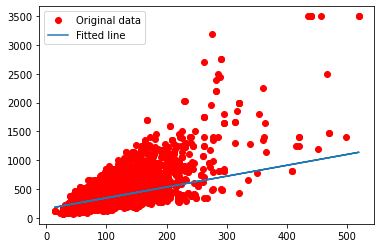

In [63]:
# Display results
y_pred = weights * x_train + bias
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, y_pred, label='Fitted line')
plt.legend()
plt.show()